In [62]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

# To filter Future Warnings from seaborn library based on matplotlib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [63]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

# To check the data types of the columns
# df = pd.DataFrame(data)
# df.dtypes

<Axes: xlabel='survived', ylabel='fare'>

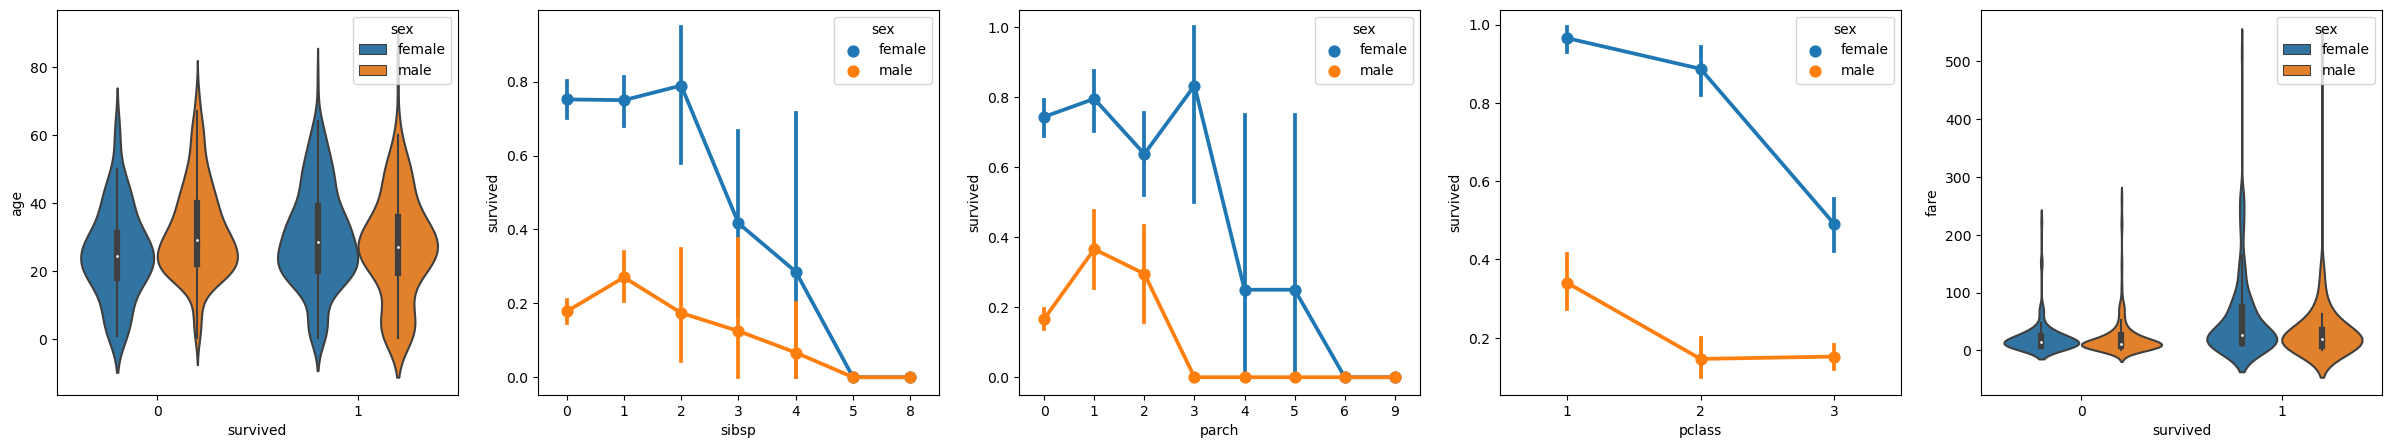

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x= "survived", y= "age", hue= "sex", data=data, ax= axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [65]:
# To use pandas to calculate correlations, we need the variables to be numeric
data.replace({'male': 1, 'female': 0}, inplace=True)

In [66]:
# The closer a value is to 1, the higher the correlation between the value and the result.
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [67]:
# Now merge sibsp (siblings & spouse) with parch (parents & children) in a single column
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [68]:
# Keep only relevant columns, and drop rows with missing values, to train the model
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [69]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)


In [70]:
# Scale input values with StandardScaler: sensible to outliears, removes mean and scales the data to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # fit to data, then transform it
x_test = sc.transform(x_test) # perform standardization by centering and scaling

In [71]:
# Sklearn provides a variety of common supervised and unsupervised learning algorithms, check their chart at: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [72]:
# Show the model's score
from sklearn import metrics
predict_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [73]:
# Implementing the model2 with a neural network
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()

In [74]:
# Add layers to the model
# First layer 5 neurons for the 5 fields (sex, pclass, age, relatives, fare)
# Last layer 1 neuron for the result (survived or not)
model2.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model2.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Check model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Once the model is created, we need to compile it
# Optimizer: algorithm to find the set of parameters that minimizes the loss function
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model2.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5837
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.5873
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6830
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.7584
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7751
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7763
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7763
Epoch 11/50
27/27 [

In [76]:
# First test with naive_bayes, Gaussian NB 
predict_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, predict_test))

# Second test with neural network
y_pred = np.rint(model2.predict(x_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

0.7464114832535885
7/7 [==============================] - 0s 2ms/step
0.7990430622009569
